In [1]:
import os
import geopandas as gpd

data_path = "./../data"

In [ ]:
boundaries_gdf = gpd.read_parquet(os.path.join(data_path, "boundaries.parquet"))
crs = 4326
boundaries_gdf = boundaries_gdf.to_crs(crs)
crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30째E and 36째E, northern hemisphere between equator and 84째N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. T체rkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Processing geometries

In [3]:
roads_gdf = gpd.read_parquet(os.path.join(data_path, "osm/roads.parquet")).to_crs(crs)
railways_gdf = gpd.read_parquet(os.path.join(data_path, "osm/railways.parquet")).to_crs(crs)
water_gdf = gpd.read_parquet(os.path.join(data_path, "osm/water.parquet")).to_crs(crs)

In [4]:
from blocksnet.blocks.cutter import preprocess_urban_objects

lines_gdf, polygons_gdf = preprocess_urban_objects(roads_gdf, railways_gdf, water_gdf)

2025-02-22 00:56:59.689 | INFO     | blocksnet.blocks.cutter.preprocessing.core:preprocess_urban_objects:36 - Checking roads schema
2025-02-22 00:56:59.803 | INFO     | blocksnet.blocks.cutter.preprocessing.core:preprocess_urban_objects:42 - Checking railways schema
2025-02-22 00:56:59.821 | INFO     | blocksnet.blocks.cutter.preprocessing.core:preprocess_urban_objects:48 - Checking water schema


## Cut urban blocks

In [ ]:
from blocksnet.blocks.cutter import cut_urban_blocks
    
blocks_gdf = cut_urban_blocks(boundaries_gdf, lines_gdf, polygons_gdf)

2025-02-22 00:57:00.029 | INFO     | blocksnet.blocks.cutter.processing.core:wrapper:20 - Checking boundaries schema
2025-02-22 00:57:00.042 | INFO     | blocksnet.blocks.cutter.processing.core:wrapper:24 - Checking line objects schema


2025-02-22 00:57:00.202 | INFO     | blocksnet.blocks.cutter.processing.core:wrapper:30 - Checking polygon objects schema
2025-02-22 00:57:00.227 | INFO     | blocksnet.blocks.cutter.processing.core:_exclude_polygons:45 - Excluding polygon objects from blocks
2025-02-22 00:57:01.399 | INFO     | blocksnet.blocks.cutter.processing.core:_get_enclosures:51 - Setting up enclosures
2025-02-22 00:57:04.429 | INFO     | blocksnet.blocks.cutter.processing.core:_fill_holes:68 - Filling holes inside the blocks
2025-02-22 00:57:05.382 | INFO     | blocksnet.blocks.cutter.processing.core:_filter_overlapping:78 - Filtering overlapping geometries
2025-02-22 00:57:07.990 | SUCCESS  | blocksnet.blocks.cutter.processing.core:cut_urban_blocks:119 - Blocks are successfully cut!


<Axes: >

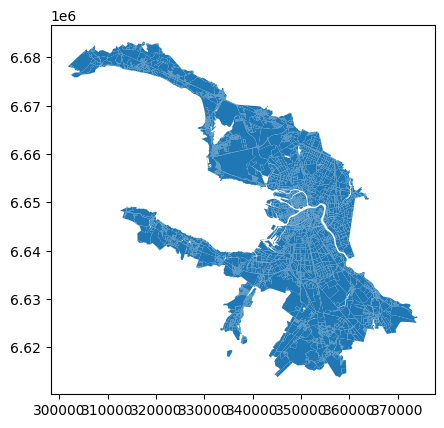

In [6]:
blocks_gdf.plot()